## KKBox Benchmark (PyCox Preprocessing)

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
import numpy as np
import pandas as pd

os.getenv("PYCOX_DATA_DIR")

'data/kkbox'

In [2]:
from pycox.datasets import kkbox_v1

kkbox_v1._path_dir.mkdir(exist_ok=True)

In [4]:
if not kkbox_v1.path_train.exists():    
    kkbox_v1._csv_to_feather_with_types()
    kkbox_v1._make_survival_data()
    kkbox_v1._make_survival_covariates()
    kkbox_v1._make_train_test_split()

In [5]:
train = kkbox_v1.read_df(subset="train")
train

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,khTQl3B7k10IA9zPMpm5jMc4VxHKh+mo8ngDaos2Od4=,1.0,0.0,0.0,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
1,2jy816+2+7/UYg7RNhP1PnifBmP9CL0/3ioqGBg/jrc=,0.0,0.0,0.0,694.0,4.262680,3.433987,5.017280,5.017280,0.0,0.0,15,NaN,9,0.0,1.0,0.0,1.0
2,yTnAG21OBNMRG6yL2ovgHG5zJ2GFTRpRZDVP04dqsKY=,1.0,0.0,0.0,61.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
3,PU3abZF43MOIGUKry3qu9vetFKi1d7BlJ8//Kk4zIHY=,0.0,0.0,0.0,58.0,0.693147,3.433987,4.615121,4.615121,1.0,0.0,1,NaN,7,-0.0,1.0,0.0,1.0
4,h7n6QC+6LkEsVtWHknIABBGN87SSMhu1cCEYq0f5lxw=,1.0,0.0,0.0,30.0,0.693147,3.433987,5.010635,0.000000,1.0,0.0,13,female,7,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786353,v8HEZ52iJ1vMcy6s4nA6fdmJ4GbJuRdPyk4YP9J8yx4=,1.0,0.0,0.0,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
1786354,h8Ui90iYczbI7Z4ezCl6AQ6kKjsz0kF+2vt7jrDCjV8=,0.0,0.0,0.0,476.0,0.693147,2.397895,0.000000,0.000000,0.0,0.0,4,female,4,27.0,0.0,0.0,1.0
1786355,7k3u/jaF58rUPcqsxLVizRAZgh5HbZB3UR0tHsC86qY=,0.0,0.0,0.0,273.0,6.228511,3.433987,5.198497,5.198497,0.0,0.0,12,male,3,22.0,0.0,0.0,1.0
1786356,qXE+j9MNdtPUbcCy2pyKLzAWZ1LztDukUa9RKmFfDUE=,1.0,0.0,0.0,59.0,7.101676,3.433987,5.010635,5.010635,1.0,0.0,14,female,9,27.0,0.0,0.0,1.0


In [6]:
val = kkbox_v1.read_df(subset="val")
val

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,ySeDlgqnyg7s6GysoIT6PA4dxKUtf7nNRCwc1rM9KHI=,1.0,0.0,0.000000,413.0,6.037871,6.018593,7.489412,7.489412,0.0,0.0,8,female,9,39.0,0.0,0.0,1.0
1,V8P2TtMajBFvu73ylPvuuL+TZt4gnJga4/2eP7zfcLg=,1.0,0.0,0.000000,29.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
2,TBph+97zCjGwbI2nUxuWyOp2qpWqVn9k1iR4uaXEG7k=,0.0,0.0,0.000000,791.0,7.178545,3.433987,4.867535,4.867535,1.0,0.0,1,NaN,7,0.0,1.0,0.0,1.0
3,4+I6SwJRG6DipLKRrJtu4TivQqfEqUUs+FxK+dvo1wI=,1.0,0.0,0.000000,14.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
4,S746huKfehQhDU9EHDppF5hnFRkNCBTilQT1l5XXibo=,1.0,0.0,0.000000,673.0,7.280697,3.465736,5.010635,5.010635,1.0,0.0,5,male,9,39.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198635,YvRQdn78R7qa5uC4p/N4m+iJmcQIEJQmvtB3DLuER3U=,1.0,0.0,0.000000,3.0,6.216606,5.278115,0.000000,0.000000,0.0,0.0,5,female,3,48.0,0.0,0.0,1.0
198636,0TSySc3XgF3BoFN1gmDxssKqARwnE/fUnPQau+6wOgA=,1.0,0.0,0.000000,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
198637,t4J50mpx8fCCalbag3FWOem0KblFWMgVKuq7fPwuFLk=,0.0,0.0,0.000000,150.0,0.000000,3.433987,4.867535,4.867535,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
198638,7d7OstX9Mt6oIf7lt16ssUiGvmVou1vdolonepYfeY0=,1.0,0.0,0.000000,30.0,5.710427,0.000000,0.000000,5.010635,0.0,0.0,1,NaN,9,0.0,1.0,0.0,1.0


In [7]:
test = kkbox_v1.read_df(subset="test")
test

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,O77INmOJUmfNOpkjIKDqUg2mspqVilbeIZNMeA9uSPI=,1.0,0.0,0.0,15.0,0.693147,2.708050,0.000000,0.000000,0.0,0.0,1,NaN,9,0.0,1.0,0.0,1.0
1,i7Rxt2tQegmPFrnn7gkeETBhWCAJ5TSuo5/hlp/nlWk=,1.0,0.0,0.0,410.0,3.583519,6.018593,7.489412,7.489412,0.0,0.0,13,male,3,49.0,0.0,0.0,1.0
2,y6oqfjpx42uMgAhqw75FzQWfPE/2JKe0TkLfHyCcdIY=,1.0,0.0,0.0,410.0,7.852439,3.465736,5.010635,5.010635,1.0,0.0,22,male,9,29.0,0.0,0.0,1.0
3,y6oqfjpx42uMgAhqw75FzQWfPE/2JKe0TkLfHyCcdIY=,1.0,1.0,0.0,138.0,8.045268,3.433987,5.010635,5.010635,1.0,0.0,22,male,9,30.0,0.0,0.0,0.0
4,ovOeCMa24deYRZkxKq9DLVCg0HYxFH3UC0kvluRr7hg=,1.0,0.0,0.0,393.0,0.693147,5.278115,6.796824,6.796824,0.0,0.0,5,female,9,20.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661743,oDvTbXiI3lFVVP7FwP5S7902FHg43QxywIaL+ph362U=,1.0,0.0,0.0,394.0,3.044523,3.465736,5.010635,5.010635,1.0,0.0,5,female,3,24.0,0.0,0.0,1.0
661744,/gHyWzlbA/hSJUPaOPySmPPZg77knoIyRFxmnbVdfq8=,1.0,0.0,0.0,28.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
661745,rvOvNfogF1rvCJ42ZHPmgflxaXm2Ix+vxizd/A4MDKM=,1.0,0.0,0.0,3.0,4.672829,2.079442,0.000000,0.000000,0.0,0.0,1,NaN,9,0.0,1.0,0.0,1.0
661746,QjyVGBDNTHLZq+jSGCnyZNmDNmOygedtzDvbbik1wAQ=,1.0,0.0,0.0,440.0,7.639642,6.018593,7.489412,7.489412,0.0,0.0,13,female,9,46.0,0.0,0.0,1.0


In [8]:
train.msno.nunique()

1582202

In [9]:
train.isna().sum()

msno                            0
event                           0
n_prev_churns                   0
log_days_between_subs           0
duration                        0
log_days_since_reg_init         0
log_payment_plan_days           0
log_plan_list_price             0
log_actual_amount_paid          0
is_auto_renew                   0
is_cancel                       0
city                       290209
gender                     990092
registered_via             290209
age_at_start                    0
strange_age                     0
nan_days_since_reg_init         0
no_prev_churns                  0
dtype: int64

In [10]:
def replace_nan(df):
    df["gender"] = df["gender"].astype(str)
    gender_map = dict(zip(df["gender"].unique(), range(df["gender"].nunique())))
    df["gender"] = df["gender"].map(gender_map)
    
    df["city"] = df["city"].astype(str).replace("nan", -1).astype(int)
    
    df["registered_via"] = df["registered_via"].astype(str).replace("nan", -1).astype(int)

In [11]:
for df in [train, test, val]:
    replace_nan(df)

In [12]:
from sksurv.datasets import get_x_y

# remove ID from covariates
cols = list(set(train.columns) - {"msno"})

X_train, y_train = get_x_y(train[cols], ("event", "duration"), pos_label=1)
X_test, y_test = get_x_y(test[cols], ("event", "duration"), pos_label=1)
X_val, y_val = get_x_y(val[cols], ("event", "duration"), pos_label=1)

## Fit some baselines models

In [13]:
y_time = np.hstack([y_train["duration"], y_test["duration"], y_val["duration"]])
lower, upper = np.percentile(y_time, [10, 90])
times = np.linspace(lower, upper, 100)

In [22]:
import pickle
from pathlib import Path

from sksurv.metrics import (
    brier_score,
    integrated_brier_score,
    cumulative_dynamic_auc,
    concordance_index_censored,
    concordance_index_ipcw,
)


def get_scores(model, y_train, X_test, y_test, times):

    survival_probs = model.predict_survival_function(X_test, return_array=True)
    #cumulative_hazards = model.predict_cumulative_hazard_function(X_test, return_array=True)
    #risk_estimate = cumulative_hazards.sum(axis=1)

    _, brier_scores = brier_score(y_train, y_test, survival_probs, times)
    ibs = integrated_brier_score(y_train, y_test, survival_probs, times)
    
    #auc, mean_auc = cumulative_dynamic_auc(y_train, y_test, cumulative_hazards, times)
    
    #c_index = concordance_index_censored(y_test["event"], y_test["duration"], risk_estimate)[0]
    #c_index_ipcw = concordance_index_ipcw(y_train, y_test, risk_estimate)[0]
    
    return dict(
        brier_scores=brier_scores,
        ibs=ibs,
        #auc=auc,
        #mean_auc=mean_auc,
        #c_index=c_index,
        #c_index_ipcw=c_index_ipcw,
    )


def save_scores(name, scores):
    path = _make_path(name, create_dir=True)
    pickle.dump(scores, open(path, "wb+"))

    
def load_scores(name):
    path = _make_path(name, create_dir=False)
    return pickle.load(open(path, "rb"))
    
    
def _make_path(name, create_dir):
    path = Path(os.getenv("PYCOX_DATA_DIR")) / "kkbox_v1" / "results"
    if create_dir:
        path.mkdir(exist_ok=True, parents=True)
    return path / f"{name}.pkl"

### `MetaGridBC`

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression

from models.grid_bc.meta_grid_bc import MetaGridBC

lr_params = dict(
    C=1e-3, max_iter=500
)
meta_grid_bc = MetaGridBC(
    LogisticRegression(**lr_params),
    verbose=False,
    n_jobs=4
).fit(X_train.values, y_train, time_bins=times)

In [28]:
%%time

scores = get_scores(meta_grid_bc, y_train, X_test.values, y_test, times)
save_scores("meta_grid_bc", scores)
scores["ibs"]

CPU times: user 7.03 s, sys: 2.13 s, total: 9.16 s
Wall time: 9.52 s


0.12189036752628472

### `NaiveForestGridBC`: `RandomForestRegressor` + `MetaGridBC`

In [18]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from models.tree_transformer import TreeTransformer
from models.meta_grid_bc import MetaGridBC

rf_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
    verbose=True,
)
lr_params = dict(
    C=1e-3, max_iter=500
)
forest_grid_bc = make_pipeline(
    TreeTransformer(
        RandomForestRegressor(**rf_params)
    ),  # ignores censoring
    MetaGridBC(
        LogisticRegression(**lr_params),
        verbose=True,
        n_jobs=4
    ),
).fit(X_train.values, y_train, metagridbc__time_bins=times)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   25.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   56.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.3min finished


CPU times: user 1min 47s, sys: 5.07 s, total: 1min 52s
Wall time: 1min 59s


In [139]:
forest_grid_bc

Pipeline(steps=[('treetransformer',
                 TreeTransformer(base_estimator=RandomForestRegressor(max_features=8,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=100,
                                                                      n_estimators=30,
                                                                      n_jobs=4,
                                                                      verbose=True))),
                ('metagridbc',
                 MetaGridBC(classifier=LogisticRegression(C=0.001,
                                                          max_iter=500),
                            n_jobs=4, verbose=True))])

In [24]:
%%time

scores = get_scores(forest_grid_bc, y_train, X_test, y_test, times)
save_scores("forest_grid_bc", scores)
scores["ibs"]

0.10595109346510202

### `SurvivalForestGridBC`: `RandomSurvivalForest` + `MetaGridBC`

In [36]:
%%time

from sksurv.ensemble import RandomSurvivalForest

rf_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
    verbose=True,
)
lr_params = dict(
    C=1e-3, max_iter=500
)
survival_forest_grid_bc = make_pipeline(
    TreeTransformer(
        RandomSurvivalForest(**rf_params),
        handle_survival_target=True,  # activate censoring (fit on full y instead on y_duration)
        subsample=.05,  # subsample to fit the RandomSurvivalForest faster
    ),  
    MetaGridBC(
        LogisticRegression(**lr_params),
        verbose=True,
        n_jobs=4,
    ),
).fit(X_train.values, y_train, metagridbc__time_bins=times)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.7s
/Users/vincentmaladiere/mambaforge/envs/skurvival/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished


CPU times: user 19min 11s, sys: 10.5 s, total: 19min 21s
Wall time: 6min 4s


In [37]:
%%time

scores = get_scores(survival_forest_grid_bc, y_train, X_test.values, y_test, times)
save_scores("survival_forest_grid_bc", scores)
scores["ibs"]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.3s finished


CPU times: user 9.4 s, sys: 2.24 s, total: 11.6 s
Wall time: 13.6 s


0.10674772794993534

TODO: Cross val to see if that slight gap sticks

### `NaiveForestKaplanNeighbors`: `RandomForestRegressor` + `KaplanNeighbors`

In [70]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

from models.kaplan_neighbors import KaplanNeighbors
from models.tree_transformer import TreeTransformer

rf_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
    verbose=1,
)
neighbors_params = dict(
    n_neighbors=30,
    n_jobs=4,
    metric="cosine", # TODO test cosine
)

naive_forest_kn = make_pipeline(
    TreeTransformer(
        RandomForestRegressor(**rf_params),
    ),
    KaplanNeighbors(neighbors_params),
)
naive_forest_kn.fit(X_train.values, y_train, kaplanneighbors__time_bins=times)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   23.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.7s finished


CPU times: user 1min 35s, sys: 1.67 s, total: 1min 36s
Wall time: 32.1 s


Pipeline(steps=[('treetransformer',
                 TreeTransformer(base_estimator=RandomForestRegressor(max_features=8,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=100,
                                                                      n_estimators=30,
                                                                      n_jobs=4,
                                                                      verbose=1))),
                ('kaplanneighbors',
                 KaplanNeighbors(neighbors_params={'metric': 'cosine',
                                                   'n_jobs': 4,
                                                   'n_neighbors': 30}))])

In [71]:
%%time

scores = get_scores(naive_forest_kn, y_train, X_test.values[:1000], y_test[:1000], times)
save_scores("naive_forest_kn_cosine", scores)
scores["ibs"]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished


CPU times: user 1min 46s, sys: 28 s, total: 2min 14s
Wall time: 1min 3s


0.10609362006519708

### `NaiveKaplanTree`: `DecisionTreeRegressor` + `KaplanTree`

In [109]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

from models.kaplan_tree import KaplanTree
from models.tree_transformer import TreeTransformer

tree_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    max_features=8,
)

naive_kaplan_tree = make_pipeline(
    TreeTransformer(
        DecisionTreeRegressor(**tree_params),
    ),
    KaplanTree(),  # Kaplan Meier is a non-parametric model
)
naive_kaplan_tree.fit(X_train.values, y_train, kaplantree__time_bins=times)

CPU times: user 14.9 s, sys: 367 ms, total: 15.2 s
Wall time: 15.4 s


Pipeline(steps=[('treetransformer',
                 TreeTransformer(base_estimator=DecisionTreeRegressor(max_features=8,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=100))),
                ('kaplantree', KaplanTree())])

In [110]:
%%time

scores = get_scores(naive_kaplan_tree, y_train, X_test.values, y_test, times)
save_scores("naive_kaplan_tree", scores)
scores["ibs"]

CPU times: user 9.53 s, sys: 478 ms, total: 10 s
Wall time: 10 s


0.10749768210838108

## XGBSE models

In [ ]:
from xgbse import XGBSEDebiasedBCE

# TODO
#xgbse_bce = XGBSEDebiasedBCE()

## PyCox models

In [ ]:
# TODO

### Scores

In [125]:
import pandas as pd


def get_all_results():
    results_dir = Path(os.getenv("PYCOX_DATA_DIR")) / "kkbox_v1" / "results"
    results = []
    for path in results_dir.iterdir():
        if path.is_file() and path.suffix == ".pkl":
            result = pickle.load(open(path, "rb"))
            model = path.name.split(".")[0]
            result["model"] = model
            results.append(result)
    return pd.DataFrame(results).sort_values("ibs")

In [126]:
results = get_all_results()
results[["model", "ibs"]]

,model,ibs
1,naive_forest_grid_bc,0.105951
2,naive_forest_kn_cosine,0.106094
3,survival_forest_grid_bc,0.106748
5,naive_forest_kn,0.106774
4,naive_kaplan_tree,0.107498
0,meta_grid_bc,0.121890


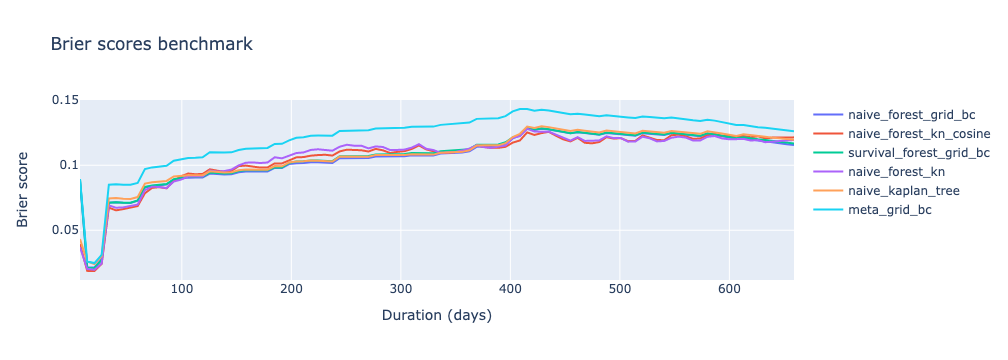

In [132]:
import plotly.graph_objects as go

cols = results.columns
col_to_idx = dict(zip(cols, range(len(cols))))

fig = go.Figure([
    go.Scatter(
        x=times,
        y=row[col_to_idx["brier_scores"]],
        name=row[col_to_idx["model"]],
    )
    for row in results.values
])

fig.update_layout(
    xaxis_title="Duration (days)",
    yaxis_title="Brier score",
    title="Brier scores benchmark",
)
fig.show()